# Classification and Regression Trees at Scale

In [1]:
import numpy as np
from sklearn import tree
iq=[90,110,100,140,110,100]
age=[42,20,50,40,70,50]
anincome=[40,20,46,28,100,20]
businessowner=[0,1,0,1,0,0]
univdegree=[0,1,0,1,0,0]
smoking=[1,0,0,1,1,0]
ids=np.column_stack((iq, age, anincome,businessowner,univdegree))
names=['iq','age','income','univdegree']
dt = tree.DecisionTreeClassifier(random_state=99)
dt.fit(ids,smoking)
dt.predict(ids)
tree.export_graphviz(dt,out_file='tree2.dot',feature_names=names,label=all,max_depth=5,class_names=True)


Extremely Randomized Forest

In [3]:
import pandas as pd
import numpy as np
import os
import xlrd
import urllib
#set your path here
os.chdir('/your-path-here')

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
filename='creditdefault.xls'
urllib.urlretrieve(url, filename)

target = 'default payment next month'
data = pd.read_excel('creditdefault.xls', skiprows=1)

target = 'default payment next month'
y = np.asarray(data[target])
features = data.columns.drop(['ID', target])
X = np.asarray(data[features])

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=101)

clf = ExtraTreesClassifier(n_estimators=500, random_state=101)
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=3,scoring='accuracy', n_jobs=-1)
print "ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))



y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print confusionMatrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)






ExtraTreesClassifier -> cross validation accuracy: mean = 0.812 std = 0.003
[[6610  448]
 [1238  704]]


0.81266666666666665

Fast parameter optimization with randomized search

In [4]:

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV


param_dist = {"max_depth": [1,3, 7,8,12,None],
             "max_features": [8,9,10,11,16,22],
             "min_samples_split": [8,10,11,14,16,19],
             "min_samples_leaf": [1,2,3,4,5,6,7],
             "bootstrap": [True, False]}

#here we specify the search settings, we use only 25 random parameter 
#valuations but we manage to keep training times in check.
rsearch = RandomizedSearchCV(clf, param_distributions=param_dist,
                                  n_iter=25)  

rsearch.fit(X_train,y_train)
rsearch.grid_scores_

bestclf=rsearch.best_estimator_
print bestclf


y_pred=bestclf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_pred)
print confusionMatrix
accuracy=accuracy_score(y_test, y_pred)
print accuracy

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=12, max_features=11, max_leaf_nodes=None,
           min_samples_leaf=2, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)
[[6738  320]
 [1246  696]]
0.826


In [5]:
from sklearn.datasets import fetch_covtype
import numpy as np
from sklearn.cross_validation import train_test_split
dataset = fetch_covtype(random_state=111, shuffle=True)
dataset = fetch_covtype()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
del(X,y)
covtrain=np.c_[X_train,y_train]
covtest=np.c_[X_test,y_test]
np.savetxt('covtrain.csv', covtrain, delimiter=",")
np.savetxt('covtest.csv', covtest, delimiter=",")


import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
import pandas as pd
import os

#here we load sample 1
df = pd.read_csv('/yourpath/cov1.csv')
y=df[df.columns[54]]
X=df[df.columns[0:54]]



clf1=ExtraTreesClassifier(n_estimators=100, random_state=101,warm_start=True)
clf1.fit(X,y)
scores = cross_val_score(clf1, X, y, cv=3,scoring='accuracy', n_jobs=-1)
print "ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))
print scores
print 'amount of trees in the model: %s' % len(clf1.estimators_)

#sample 2
df = pd.read_csv('/yourpath/cov2.csv')
y=df[df.columns[54]]
X=df[df.columns[0:54]]

clf1.set_params(n_estimators=150, random_state=101,warm_start=True)
clf1.fit(X,y)
scores = cross_val_score(clf1, X, y, cv=3,scoring='accuracy', n_jobs=-1)
print "ExtraTreesClassifier after params -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))
print scores
print 'amount of trees in the model: %s' % len(clf1.estimators_)

#sample 3
df = pd.read_csv('/yourpath/cov3.csv')
y=df[df.columns[54]]
X=df[df.columns[0:54]]
clf1.set_params(n_estimators=200, random_state=101,warm_start=True)
clf1.fit(X,y)
scores = cross_val_score(clf1, X, y, cv=3,scoring='accuracy', n_jobs=-1)
print "ExtraTreesClassifier after params -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))
print scores
print 'amount of trees in the model: %s' % len(clf1.estimators_)

# Now let’s predict our combined model on the test set and check our score.

df = pd.read_csv('/yourpath/covtest.csv')
X=df[df.columns[0:54]]
y=df[df.columns[54]]
pred2=clf1.predict(X)
scores = cross_val_score(clf1, X, y, cv=3,scoring='accuracy', n_jobs=-1)
print "final test score %r" % np.mean(scores)



ExtraTreesClassifier -> cross validation accuracy: mean = 0.803 std = 0.003
[ 0.805997    0.79964007  0.8021021 ]
amount of trees in the model: 100
ExtraTreesClassifier after params -> cross validation accuracy: mean = 0.798 std = 0.003
[ 0.80155875  0.79651861  0.79465626]
amount of trees in the model: 150
ExtraTreesClassifier after params -> cross validation accuracy: mean = 0.798 std = 0.006
[ 0.8005997   0.78974205  0.8033033 ]
amount of trees in the model: 200
final test score 0.92185447181058278


Cart & Boosting (GBM)

In [35]:
import pandas
import urllib2
import urllib2
from sklearn import ensemble
columnNames1_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
columnNames1 = [
   line.strip().split(':')[0]
   for line in urllib2.urlopen(columnNames1_url).readlines()[33:]]

columnNames1
n = 0
for i in columnNames1:
   columnNames1[n] = i.replace('word_freq_','')
   n += 1
print columnNames1

spamdata = pandas.read_csv(
   'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',
   header=None, names=(columnNames1 + ['spam'])
)

X = spamdata.values[:,:57]
y=spamdata['spam']

spamdata.head()

import numpy as np
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import train_test_split
from sklearn.metrics  import recall_score, f1_score
from sklearn.cross_validation import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=22)

clf = ensemble.GradientBoostingClassifier(n_estimators=300,random_state=222,max_depth=16,learning_rate=.1,subsample=.5)
scores=clf.fit(X_train,y_train)
scores2 = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy',n_jobs=-1)
print scores2.mean()

y_pred = cross_val_predict(clf, X_test, y_test, cv=10)
print 'validation accuracy %s' % accuracy_score(y_test, y_pred)
    


confusionMatrix = confusion_matrix(y_test, y_pred)
print confusionMatrix

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

clf.feature_importances_

def featureImp_order(clf, X, k=5):
    return X[:,clf.feature_importances_.argsort()[::-1][:k]]
newX = featureImp_order(clf,X,2)
print newX

# let's order the features in amount of importance

print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), columnNames1),
            reverse=True)


['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
0.945030177548
validation accuracy 0.928312816799
[[799  36]
 [ 63 483]]
[[ 0.     0.   ]
 [ 0.     0.21 ]
 [ 0.01   0.   ]
 ..., 
 [ 0.102  0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]]
[(0.2262, 'char_freq_;'), (0.0945, 'report'), (0.0637, 'capital_run_length_average'), (0.0467, 'you'), (0.0461, 'capital_run_length_total'), (0.0403, 'business'), (0.0397, 'char_freq_!'), (0.0333, 'will'), (0.0295, '

In [9]:
gbc = GradientBoostingClassifier(warm_start=True, learning_rate=.05, max_depth=20,random_state=0)
for n_estimators in range(1, 1500, 100):
    gbc.set_params(n_estimators=n_estimators)
    gbc.fit(X_train, y_train) 
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))
print(gbc.set_params)


             precision    recall  f1-score   support

          0       0.93      0.95      0.94       835
          1       0.92      0.89      0.91       546

avg / total       0.93      0.93      0.93      1381

<bound method GradientBoostingClassifier.set_params of GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=20, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1401,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=True)>


Training and storing GBM models

In [14]:
import errno
import os
#set your path here
path='/yourpath/clfs'

clfm=os.makedirs(path)
os.chdir(path)

In [16]:
#now let's load our stored model and use it for prediction.
from sklearn.externals import joblib
joblib.dump( gbc,'clf_gbc.pkl')

model_clone = joblib.load('clf_gbc.pkl')
zpred=model_clone.predict(X_test)
print zpred


[1 1 1 ..., 1 0 0]


XGboost

XGboost Regression

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report
from sklearn import cross_validation

clf = xgb.XGBClassifier(n_estimators=100,max_depth=8,
                                       learning_rate=.1,subsample=.5)

clf1 = GradientBoostingClassifier(n_estimators=100,max_depth=8,
                                       learning_rate=.1,subsample=.5)

xgm=clf.fit(X_train,y_train)
gbmf=clf1.fit(X_train,y_train)

y_pred = xgm.predict(X_test)
y_pred2 = gbmf.predict(X_test)

print 'XGBoost results %r' % (classification_report(y_test, y_pred))
print 'gbm results %r' % (classification_report(y_test, y_pred2))


XGBoost results '             precision    recall  f1-score   support\n\n          0       0.95      0.97      0.96       835\n          1       0.95      0.93      0.94       546\n\navg / total       0.95      0.95      0.95      1381\n'
gbm results '             precision    recall  f1-score   support\n\n          0       0.94      0.97      0.96       835\n          1       0.95      0.91      0.93       546\n\navg / total       0.95      0.95      0.95      1381\n'


XGBoost Regression

In [18]:
import numpy as np
import scipy.sparse
import xgboost as xgb
import os
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
pd=fetch_california_housing()

#because the y  variable is highly skewed we apply the log transformation 
y=np.log(pd.target)
X_train, X_test, y_train, y_test = train_test_split(pd.data,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=111)
names = pd.feature_names
print names

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV

clf=xgb.XGBRegressor(gamma=0,objective= "reg:linear",nthread=-1)


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print 'score before gridsearch %r' % mean_squared_error(y_test, y_pred)

params = {
 'max_depth':[4,6,8],
 'n_estimators':[1000],
'min_child_weight':range(1,3),
'learning_rate':[.1,.01,.001],
'colsample_bytree':[.8,.9,1]
,'gamma':[0,1]}

#with the parameter nthread we specify XGBoost for parallelisation 
cvx = xgb.XGBRegressor(objective= "reg:linear",nthread=-1)
clf=GridSearchCV(estimator=cvx,param_grid=params,n_jobs=-1,scoring='mean_absolute_error',verbose=True)

clf.fit(X_train,y_train)
print clf.best_params_
y_pred = clf.predict(X_test)
print 'score after gridsearch %r' %mean_squared_error(y_test, y_pred)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
score before gridsearch 0.07110580252173157
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 31.8min finished


{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 1000, 'max_depth': 8, 'gamma': 0}
score after gridsearch 0.049878294113796254


XGBoost and variable importance

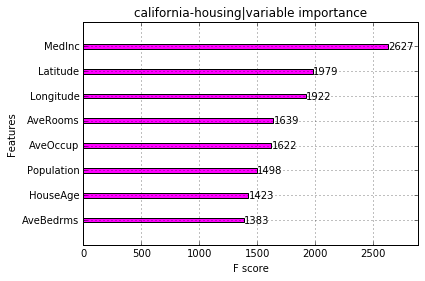

In [20]:
import numpy as np
import os
from matplotlib import pylab as plt
%matplotlib inline   
#our best parameter set 
# {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 500, #'max_depth': 8, 'gamma': 0}

params={'objective': "reg:linear",
        'eval_metric': 'rmse',
        'eta': 0.1,
       'max_depth':8,
       'min_samples_leaf':4,
        'subsample':.5,
        'gamma':0
       }

dm = xgb.DMatrix(X_train, label=y_train,
                 feature_names=names)
regbgb = xgb.train(params, dm, num_boost_round=100)
np.random.seed(1)
regbgb.get_fscore()


regbgb.feature_names
regbgb.get_fscore()
xgb.plot_importance(regbgb,color='magenta',title='california-housing|variable importance')


In [21]:
import urllib
from sklearn.datasets import dump_svmlight_file
from sklearn.datasets import load_svmlight_file
trainfile = urllib.URLopener()
trainfile.retrieve("http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2", "pokertrain.bz2")
X,y = load_svmlight_file('pokertrain.bz2')
dump_svmlight_file(X, y,'pokertrain', zero_based=True,query_id=None, multilabel=False)
testfile = urllib.URLopener()
testfile.retrieve("http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.t.bz2", "pokertest.bz2")
X,y = load_svmlight_file('pokertest.bz2')
dump_svmlight_file(X, y,'pokertest', zero_based=True,query_id=None, multilabel=False)
del(X,y)
from sklearn.metrics import classification_report
import numpy as np
import xgboost as xgb
#insert the proper file path
dtrain = xgb.DMatrix('/yourpath/pokertrain#dtrain.cache')
dtest = xgb.DMatrix('/yourpath/pokertest#dtestin.cache')


param = {'max_depth':8,'objective':'multi:softmax','nthread':2,'num_class':10,'verbose':True}
num_round=100
watchlist = [(dtest,'eval'), (dtrain,'train')]
bst = xgb.train(param, dtrain, num_round,watchlist)
print bst

bst.predict(dtest)

[0]	eval-merror:0.434653	train-merror:0.409476
[1]	eval-merror:0.407635	train-merror:0.366413
[2]	eval-merror:0.398750	train-merror:0.354658
[3]	eval-merror:0.389701	train-merror:0.338185
[4]	eval-merror:0.385193	train-merror:0.328948
[5]	eval-merror:0.380848	train-merror:0.318593
[6]	eval-merror:0.373571	train-merror:0.308996
[7]	eval-merror:0.367774	train-merror:0.301519
[8]	eval-merror:0.364031	train-merror:0.297721
[9]	eval-merror:0.359936	train-merror:0.290284
[10]	eval-merror:0.355028	train-merror:0.284086
[11]	eval-merror:0.349160	train-merror:0.273291
[12]	eval-merror:0.346769	train-merror:0.270532
[13]	eval-merror:0.342033	train-merror:0.260816
[14]	eval-merror:0.337239	train-merror:0.252939
[15]	eval-merror:0.334342	train-merror:0.249300
[16]	eval-merror:0.332645	train-merror:0.244462
[17]	eval-merror:0.330129	train-merror:0.235546
[18]	eval-merror:0.325973	train-merror:0.225750
[19]	eval-merror:0.323557	train-merror:0.217553
[20]	eval-merror:0.320777	train-merror:0.208557
[2

array([ 0.,  0.,  1., ...,  0.,  0.,  1.], dtype=float32)

In [ ]:
import pickle
bst.save_model('xgb.model')
imported_model = xgb.Booster(model_file='xgb.model')
imported_model.predict(dtest)


In [ ]:
import pandas as pd
import numpy as np
import os
import xlrd
import urllib
import h2o


#set your path here
os.chdir('/yourpath/')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
filename='spamdata.data'
urllib.urlretrieve(url, filename)
h2o.init()           



spamdata = h2o.import_file(os.path.realpath("/yourpath/spamdata.data"))
spamdata['C58']=spamdata['C58'].asfactor()
train, valid, test= spamdata.split_frame([0.6,.2], seed=1234)

spam_X = spamdata.col_names[:-1]    
spam_Y = spamdata.col_names[-1]


from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

hyper_parameters={'ntrees':[300], 'max_depth':[3,6,10,12,50],'balance_classes':['True','False'],'sample_rate':[.5,.6,.8,.9]}
grid_search = H2OGridSearch(H2ORandomForestEstimator, hyper_params=hyper_parameters)
grid_search.train(x=spam_X, y=spam_Y,training_frame=train)
print 'this is the optimum solution for hyper parameters search %s' % grid_search.show()


final = H2ORandomForestEstimator(ntrees=300, max_depth=50,balance_classes=True,sample_rate=.9)
final.train(x=spam_X, y=spam_Y,training_frame=train)
print final.predict(test)


#Note that because of randomness, the results of the gridsearch might be different from results 
#displayed in the book.

hyper_parameters={'ntrees':[300],'max_depth':[12,30,50],'sample_rate':[.5,.7,1],'col_sample_rate':[.9,1],
'learn_rate':[.01,.1,.3],}
grid_search = H2OGridSearch(H2OGradientBoostingEstimator, hyper_params=hyper_parameters)
grid_search.train(x=spam_X, y=spam_Y, training_frame=train)
print 'this is the optimum solution for hyper parameters search %s' % grid_search.show()

spam_gbm2 = H2OGradientBoostingEstimator(
  ntrees=300,
  learn_rate=0.3,
  max_depth=30,
  sample_rate=1,
  col_sample_rate=0.9,
  score_each_iteration=True,
  seed=2000000
)
spam_gbm2.train(spam_X, spam_Y, training_frame=train, validation_frame=valid)

confusion_matrix = spam_gbm2.confusion_matrix(metrics="accuracy")
print confusion_matrix
print spam_gbm2.score_history()
print spam_gbm2.predict(test)